In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
physical_devices =tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Available:  1


In [3]:
mobile=tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [22]:
def prepare_image(file):
  img_path='/content/drive/MyDrive/Randomimages/'
  img=image.load_img(img_path+file,target_size=(224,224))
  img_array=image.img_to_array(img)
  img_array_expanded_dims=np.expand_dims(img_array,axis=0)
  return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

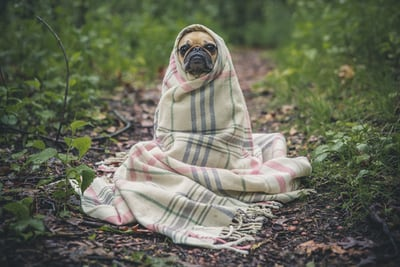

In [23]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Randomimages/photo-1433162653888-a571db5ccccf.jpg',width=300,height=200)

In [24]:
preprocessed_image=prepare_image('photo-1433162653888-a571db5ccccf.jpg')
predictions=mobile.predict(preprocessed_image)
results=imagenet_utils.decode_predictions(predictions)
results

35363/35363 [==============================] - 0s 0us/step


[[('n03903868', 'pedestal', 0.24834105),
  ('n03916031', 'perfume', 0.04067302),
  ('n04120489', 'running_shoe', 0.040091243),
  ('n03692522', 'loupe', 0.035751782),
  ('n03866082', 'overskirt', 0.031815708)]]

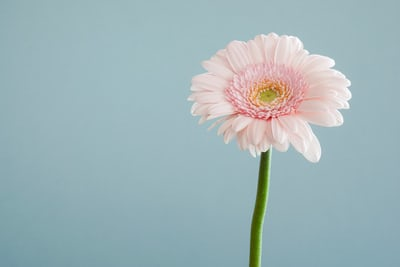

In [33]:
Image(filename='/content/drive/MyDrive/Randomimages/photo-1471899236350-e3016bf1e69e.jpg',width=300,height=200)

In [34]:
preprocessed_image=prepare_image('photo-1471899236350-e3016bf1e69e.jpg')
predictions=mobile.predict(preprocessed_image)
results=imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 22ms/step


[[('n11939491', 'daisy', 0.9394123),
  ('n03476684', 'hair_slide', 0.03330153),
  ('n03944341', 'pinwheel', 0.004385595),
  ('n04522168', 'vase', 0.0041939137),
  ('n03991062', 'pot', 0.0038254692)]]